In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import dates
import seaborn as sns
pd.set_option('display.max_columns', None)

# Import Data overview

In [2]:
df = pd.read_csv('data_dump.csv')
df.head()

,timestamp,CHWP-004Power_Factor,CHWP-004Speed_SP,CHWP-004KWh,CHWP-004Speed_Meter,CHWP-004Override_Enable,CHWP-004Running_Hours,CHWP-004Speed_Override_SP,CHWP-004VSD_Speed_Feedback,CHWP-004Remote_Control-1,CHWP-004Master_Trip_Alarm,CHWP-004VSD_Speed_Control,CHWP-004Seq,CHWP-004Override_ON_OFF,CHWP-004Local_Remote_Status,CHWP-004KVA,CHWP-004Running_Status,CHWP-004Remote_Control-2,CHWP-004Speed_Override_Enable,CHWP-004Start_Stop_Control,CHWP-004Enable,CHWP-004KW,CHWP-004Drivers.BacnetNetwork.New Chiller Plant.points.CHWP-004 Diff. Pressure,CHWP-004Diff_Pressure,CHWP-004on,ACPC-4Active_Chilled_Water_Setpoint,ACPC-4Average_Input_Current_AFD_1A,ACPC-4Evap_Approach_ckt1,ACPC-4Running_Status,ACPC-4Cond_Sat_Ref_Temperature_Ckt1,ACPC-4Chilled_Water_Setpoint,ACPC-4Cond_Sat_Ref_Temperature_Ckt2,ACPC-4CHWS_Temp,ACPC-4Evap_Sat_Ref_Temperature_Ckt1,ACPC-4Diff_Ref_Pressure_Ckt1,ACPC-4Outdoor_Air_Temperature,ACPC-4Valve_Remote_Control-1,ACPC-4Local_Remote_Start,ACPC-4Chiller_Loading_Percent,ACPC-4Evaporator_Leaving_Water_Temperature,ACPC-4Running_Hours,ACPC-4efficiency,ACPC-4Discharge_Temperature_Cprsr2A,ACPC-4Winding_Temp_#1_Motor_2A,ACPC-4Power_Factor,ACPC-4Percent_Speed_Cprsr1A,ACPC-4Average_Motor_Current_%_RLA_AFD_2A,ACPC-4Winding_Temp_#1_Motor_1A,ACPC-4Cond_Sat_Ref_Pressure_Ckt1,ACPC-4Remote_Control-1,ACPC-4CHW_Temp_Diff,ACPC-4Discharge_Temperature_Cprsr1A,ACPC-4Average_Motor_Current_%_RLA_AFD_1A,ACPC-4Valve_Remote_Control-2,ACPC-4Air_Flow_Ckt2,ACPC-4Air_Flow_Ckt1,ACPC-4Demand_Limit_Setpoint,ACPC-4Oil_Pressure_Comp2A,ACPC-4Evaporator_Water_Flow,ACPC-4Flow_Rate,ACPC-4Override_Enable,ACPC-4Winding_Temp_#2_Motor_2A,ACPC-4Chilled_Water_Setpoint1,ACPC-4MOV_Open_Control,ACPC-4Active_Chilled_Water_Setpoint1,ACPC-4Valve_Override_ON_OFF,ACPC-4Evap_Approach_ckt2,ACPC-4Valve_Override_Enable,ACPC-4Start_Stop_Control,ACPC-4Evaporator_Entering_Water_Temperature,ACPC-4Oil_Pressure_Comp1A,ACPC-4Average_Input_Current_AFD_2A,ACPC-4Evap_Ref_Pressure_Ckt1,ACPC-4Master_Trip_Alarm,ACPC-4KWh,ACPC-4Remote_Control-2,ACPC-4Cooling_Load,ACPC-4Evap_Sat_Ref_Temperature_Ckt2,ACPC-4Active_Demand_Limit_Setpoint,ACPC-4Seq,ACPC-4Percent_Speed_Cprsr2A,ACPC-4Evap_Ref_Pressure_Ckt2,ACPC-4KVA,ACPC-4Cond_Sat_Ref_Pressure_Ckt2,ACPC-4Diff_Ref_Pressure_Ckt2,ACPC-4Temp_Reset,ACPC-4Override_ON_OFF,ACPC-4CHWR_Temp,ACPC-4on,ACPC-4MOV_Oper_Status,ACPC-4MOV_CLose_Status,ACPC-4Winding_Temp_#2_Motor_1A,ACPC-4ACC04_ACPC-4 EM.points.Flow,ACPC-4ACC04_ACPC-4 EM.points.Energy(unsigned),ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Average Input Voltage AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Current W AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Current W % RLA AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Current V AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Voltage UV AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Current V % RLA AFD 2A,ACPC-4Enable,ACPC-4Comp_Power,ACPC-4ACC04_ACPC-4 EM.points.Inlet temp.,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Transistor Temperature AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.DC Bus Voltage AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Voltage UV AFD 1A,ACPC-4ACC04_ACPC-4 EM.points.Exit temp.,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Average Motor Voltage AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Inverter Base Temperature AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Current U % RLA AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Current W % RLA AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Run Time Cprsr2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Voltage VW AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Motor Current U % RLA AFD 1A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Transistor Temperature AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Stator Frequency AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Average Input Voltage AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.DC Bus Voltage AFD 2A,ACPC-4Drivers.BacnetNetwork.ACPC-4.points.Output Power AF

# Creating a column of the temperature difference

In [3]:
df['ACPC-1_T_Diff']=df['ACPC-1CHWR_Temp']-df['ACPC-1CHWS_Temp']
df['ACPC-2_T_Diff']=df['ACPC-2CHWR_Temp']-df['ACPC-2CHWS_Temp']
df['ACPC-3_T_Diff']=df['ACPC-3CHWR_Temp']-df['ACPC-3CHWS_Temp']
df['ACPC-4_T_Diff']=df['ACPC-4CHWR_Temp']-df['ACPC-4CHWS_Temp']

# We only consider the data when Comp_Power >10

In [4]:
df_power_on_ACPC1=df.loc[df['ACPC-1Comp_Power']>10]
df_power_on_ACPC2=df.loc[df['ACPC-2Comp_Power']>10]
df_power_on_ACPC3=df.loc[df['ACPC-3Comp_Power']>10]
df_power_on_ACPC4=df.loc[df['ACPC-4Comp_Power']>10]

Data overview of ACPC-1

In [5]:
df_power_on_ACPC1['ACPC-1_T_Diff'].describe()

count    2166.000000
mean        2.468695
std         0.757973
min        -3.714115
25%         1.962260
50%         2.358469
75%         2.764104
max         9.407415
Name: ACPC-1_T_Diff, dtype: float64

# Some statistics of the Temperature Difference(The symptom) 

## Temperature difference distribution

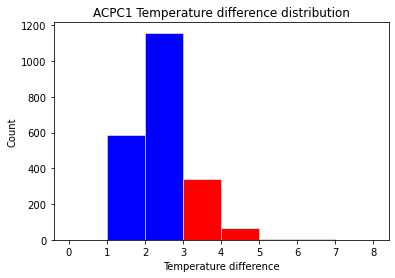

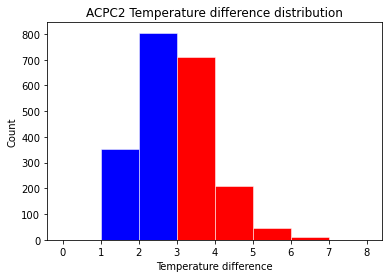

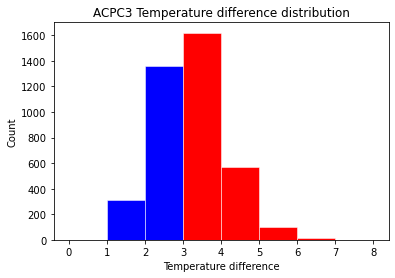

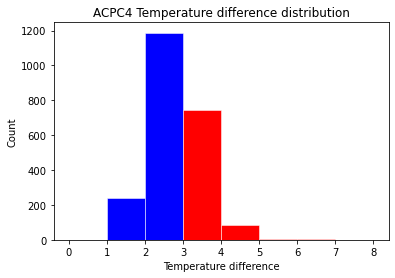

In [6]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(df_power_on_ACPC1['ACPC-1_T_Diff'].values, edgecolor='white', linewidth=0.5,bins=[0,1, 2, 3, 4,5,6,7,8])
for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,len(patches)):    
    patches[i].set_facecolor('r')
plt.xlabel('Temperature difference')
plt.ylabel('Count')
plt.title('ACPC1 Temperature difference distribution')
plt.show()

fig, ax = plt.subplots()
N, bins, patches = ax.hist(df_power_on_ACPC2['ACPC-2_T_Diff'].values, edgecolor='white', linewidth=0.5,bins=[0,1, 2, 3, 4,5,6,7,8])
for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,len(patches)):    
    patches[i].set_facecolor('r')
plt.xlabel('Temperature difference')
plt.ylabel('Count')
plt.title('ACPC2 Temperature difference distribution')
plt.show()

fig, ax = plt.subplots()
N, bins, patches = ax.hist(df_power_on_ACPC3['ACPC-3_T_Diff'].values, edgecolor='white', linewidth=0.5,bins=[0,1, 2, 3, 4,5,6,7,8])
for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,len(patches)):    
    patches[i].set_facecolor('r')
plt.xlabel('Temperature difference')
plt.ylabel('Count')
plt.title('ACPC3 Temperature difference distribution')
plt.show()

fig, ax = plt.subplots()
N, bins, patches = ax.hist(df_power_on_ACPC4['ACPC-4_T_Diff'].values, edgecolor='white', linewidth=0.5,bins=[0,1, 2, 3, 4,5,6,7,8])
for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,len(patches)):    
    patches[i].set_facecolor('r')
plt.xlabel('Temperature difference')
plt.ylabel('Count')
plt.title('ACPC4 Temperature difference distribution')
plt.show()

## Percentage of the symptom of each chiller

In [7]:
def mapfunction(diff):
    if diff < 3:
        return 'Small Delta'
    else:
        return 'Normal Delta'

In [8]:
df_power_on_ACPC1['cat']=df_power_on_ACPC1['ACPC-1_T_Diff'].map(mapfunction)
df_power_on_ACPC2['cat']=df_power_on_ACPC2['ACPC-2_T_Diff'].map(mapfunction)
df_power_on_ACPC3['cat']=df_power_on_ACPC3['ACPC-3_T_Diff'].map(mapfunction)
df_power_on_ACPC4['cat']=df_power_on_ACPC4['ACPC-4_T_Diff'].map(mapfunction)

<ipython-input-8-0870b70990ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_on_ACPC1['cat']=df_power_on_ACPC1['ACPC-1_T_Diff'].map(mapfunction)
<ipython-input-8-0870b70990ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_on_ACPC2['cat']=df_power_on_ACPC2['ACPC-2_T_Diff'].map(mapfunction)
<ipython-input-8-0870b70990ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Text(0, 0.5, 'Percentage')

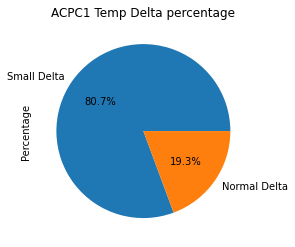

In [9]:
df_power_on_ACPC1['cat'].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%')
plt.title('ACPC1 Temp Delta percentage')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

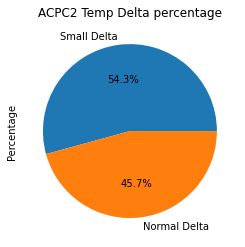

In [10]:
df_power_on_ACPC2['cat'].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%')
plt.title('ACPC2 Temp Delta percentage')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

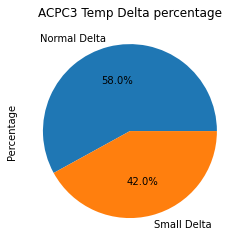

In [11]:
df_power_on_ACPC3['cat'].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%')
plt.title('ACPC3 Temp Delta percentage')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

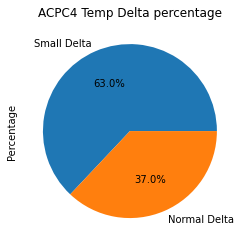

In [12]:
df_power_on_ACPC4['cat'].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%')
plt.title('ACPC4 Temp Delta percentage')
plt.ylabel('Percentage')

# Temperature of the chillers over time

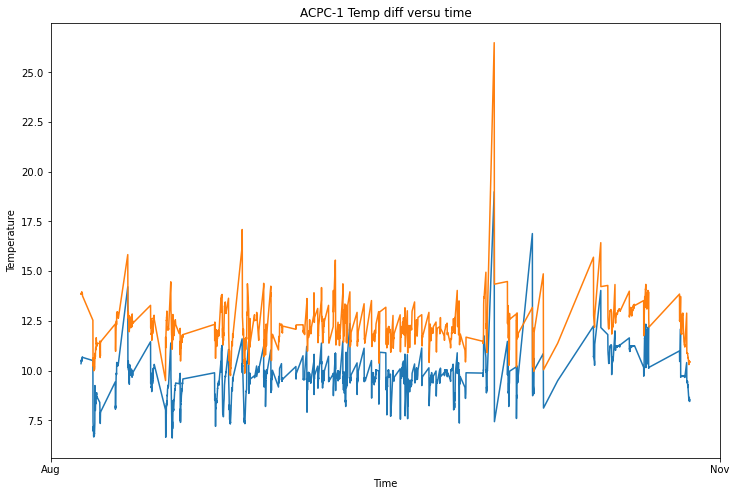

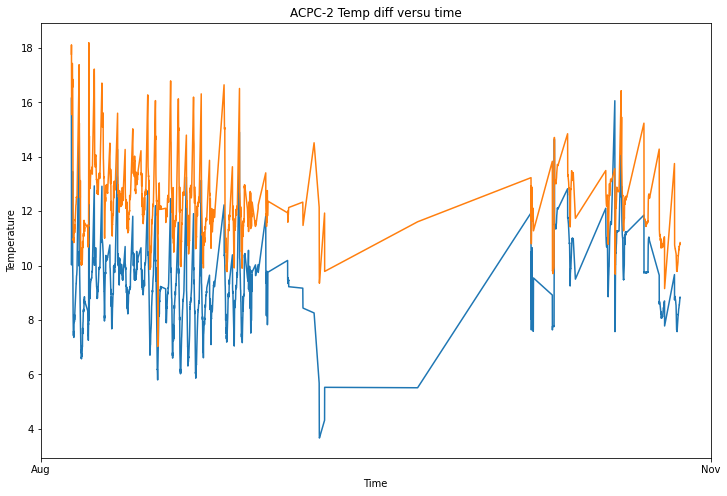

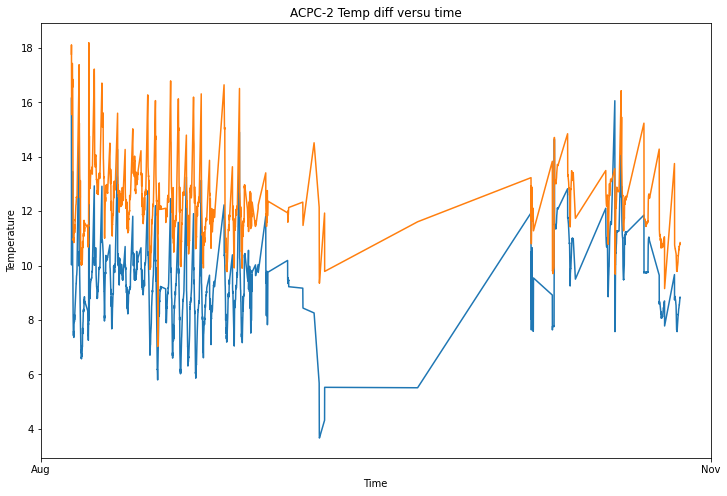

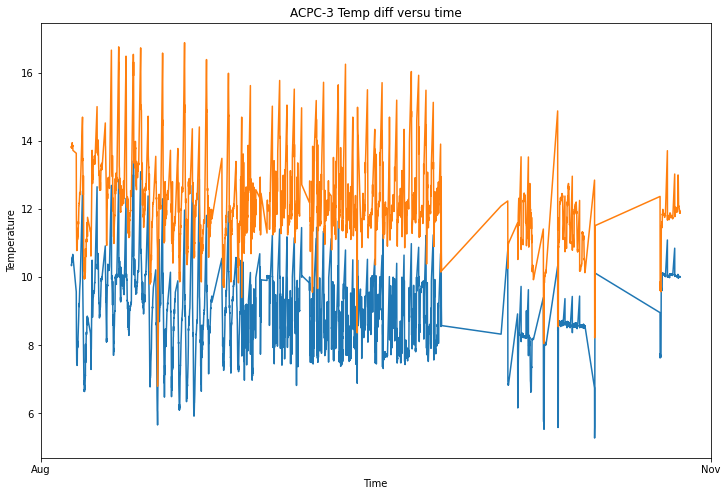

In [13]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
df_1= df_power_on_ACPC1[['timestamp','ACPC-1_T_Diff','ACPC-1CHWS_Temp','ACPC-1CHWR_Temp']].dropna()
ACPC1_diff = df_1['ACPC-1_T_Diff'].values
df_1['date']=pd.to_datetime(df_1['timestamp'].values)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.plot(df_1['date'].values, df_1['ACPC-1CHWS_Temp'].values)
ax1.plot(df_1['date'].values, df_1['ACPC-1CHWR_Temp'].values)
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')
ax1.set_title('ACPC-1 Temp diff versu time')


fig1, ax2 = plt.subplots(figsize=(12, 8))
df_2= df_power_on_ACPC2[['timestamp','ACPC-2_T_Diff','ACPC-2CHWS_Temp','ACPC-2CHWR_Temp']].dropna()
ACPC2_diff = df_2['ACPC-2_T_Diff'].values
df_2['date']=pd.to_datetime(df_2['timestamp'].values)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.plot(df_2['date'].values, df_2['ACPC-2CHWS_Temp'].values)
ax2.plot(df_2['date'].values, df_2['ACPC-2CHWR_Temp'].values)
ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature')
ax2.set_title('ACPC-2 Temp diff versu time')

fig1, ax2 = plt.subplots(figsize=(12, 8))
df_2= df_power_on_ACPC2[['timestamp','ACPC-2_T_Diff','ACPC-2CHWS_Temp','ACPC-2CHWR_Temp']].dropna()
ACPC2_diff = df_2['ACPC-2_T_Diff'].values
df_2['date']=pd.to_datetime(df_2['timestamp'].values)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.plot(df_2['date'].values, df_2['ACPC-2CHWS_Temp'].values)
ax2.plot(df_2['date'].values, df_2['ACPC-2CHWR_Temp'].values)
ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature')
ax2.set_title('ACPC-2 Temp diff versu time')

fig1, ax3 = plt.subplots(figsize=(12, 8))
df_3= df_power_on_ACPC3[['timestamp','ACPC-3_T_Diff','ACPC-3CHWS_Temp','ACPC-3CHWR_Temp']].dropna()
ACPC3_diff = df_3['ACPC-3_T_Diff'].values
df_3['date']=pd.to_datetime(df_3['timestamp'].values)
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.plot(df_3['date'].values, df_3['ACPC-3CHWS_Temp'].values)
ax3.plot(df_3['date'].values, df_3['ACPC-3CHWR_Temp'].values)
ax3.set_xlabel('Time')
ax3.set_ylabel('Temperature')
ax3.set_title('ACPC-3 Temp diff versu time')
plt.show()


NameError: name 'upper_th' is not defined

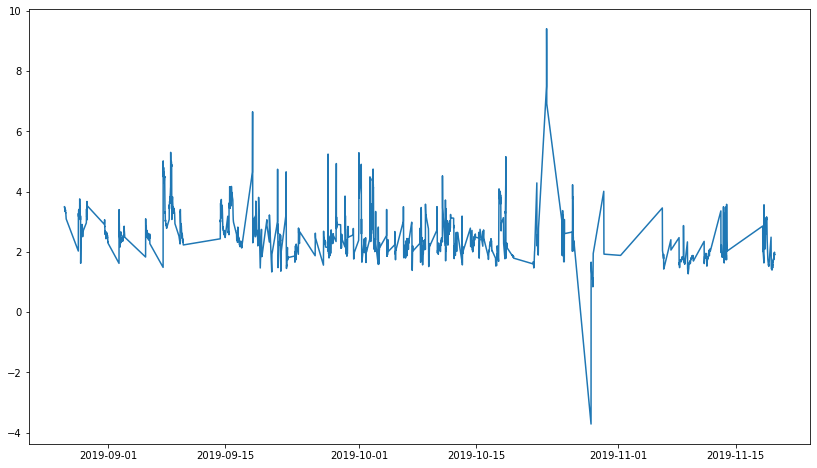

In [14]:
fig1, ax1 = plt.subplots(figsize=(14, 8))
df_1= df_power_on_ACPC1[['timestamp','ACPC-1_T_Diff']].dropna()
ACPC1_diff = df_1['ACPC-1_T_Diff'].values
colors_ACPC1 = np.where(ACPC1_diff<3,'b','r')
df_1['date']=pd.to_datetime(df_1['timestamp'].values)
ax1.plot(df_1['date'].values, df_1['ACPC-1_T_Diff'].values)
ax1.fill_between(x=df_1['date'].values, y1=upper_th, color='orange',  interpolate=True, alpha=.75)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature difference')
ax1.set_title('ACPC-1 Temp diff versu time')
ax1.hlines(y=3,xmin=df_1['date'].values[0],xmax=df_1['date'].values[len(df_1['date'].values)-1],colors='yellow')


fig1, ax2 = plt.subplots(figsize=(14, 8))
df_2= df_power_on_ACPC2[['timestamp','ACPC-2_T_Diff']].dropna()
ACPC2_diff = df_2['ACPC-2_T_Diff'].values
df_2['date']=pd.to_datetime(df_2['timestamp'].values)
ax2.plot(df_2['date'].values, df_2['ACPC-2_T_Diff'].values)
ax2.fill_between(x=df_2['date'].values, y1=upper_th, color='orange',  interpolate=True, alpha=.75)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature difference')
ax2.set_title('ACPC-2 Temp diff versu time')
ax2.hlines(y=3,xmin=df_2['date'].values[0],xmax=df_2['date'].values[len(df_2['date'].values)-1],colors='red')

fig1, ax3 = plt.subplots(figsize=(14, 8))
df_3= df_power_on_ACPC3[['timestamp','ACPC-3_T_Diff']].dropna()
ACPC3_diff = df_3['ACPC-3_T_Diff'].values
df_3['date']=pd.to_datetime(df_3['timestamp'].values)
ax3.plot(df_3['date'].values, df_3['ACPC-3_T_Diff'].values)
ax3.fill_between(x=df_3['date'].values, y1=upper_th, color='orange',  interpolate=True, alpha=.75)
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.set_xlabel('Time')
ax3.set_ylabel('Temperature difference')
ax3.set_title('ACPC-3 Temp diff versu time')
ax3.hlines(y=3,xmin=df_3['date'].values[0],xmax=df_3['date'].values[len(df_3['date'].values)-1],colors='red')

fig1, ax4 = plt.subplots(figsize=(14, 8))
df_4= df_power_on_ACPC4[['timestamp','ACPC-4_T_Diff']].dropna()
ACPC4_diff = df_4['ACPC-4_T_Diff'].values
df_4['date']=pd.to_datetime(df_4['timestamp'].values)
ax4.plot(df_4['date'].values, df_4['ACPC-4_T_Diff'].values)
ax4.fill_between(x=df_4['date'].values, y1=upper_th, color='orange',  interpolate=True, alpha=.75)
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax4.set_xlabel('Time')
ax4.set_ylabel('Temperature difference')
ax4.set_title('ACPC-4 Temp diff versu time')
ax4.hlines(y=3,xmin=df_4['date'].values[0],xmax=df_4['date'].values[len(df_4['date'].values)-1],colors='red')

plt.show()

In [ ]:
ax1.fill_between(x=df_1['date'].values, y1=upper_th, color='orange',  interpolate=True, alpha=.75)

# Temperature Difference (The symptom) < 3 degree

In [ ]:
avg_temp_diff_acpc1 = abs(df_power_on_ACPC1['ACPC-1_T_Diff'].mean())
avg_temp_diff_acpc2 = abs(df_power_on_ACPC2['ACPC-2_T_Diff'].mean())
avg_temp_diff_acpc3 = abs(df_power_on_ACPC3['ACPC-3_T_Diff'].mean())
avg_temp_diff_acpc4 = abs(df_power_on_ACPC4['ACPC-4_T_Diff'].mean())

In [ ]:
Chillers = ['ACPC1','ACPC2','ACPC3','ACPC4']
temp_diff = [avg_temp_diff_acpc1,avg_temp_diff_acpc2,avg_temp_diff_acpc3,avg_temp_diff_acpc4]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Chillers, temp_diff, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

## Flow Rate Visulization and correlation

In [ ]:
avg_flow_rate_acpc1 = df_power_on_ACPC1['ACPC-1Flow_Rate'].mean()
avg_flow_rate_acpc2 = df_power_on_ACPC2['ACPC-2Flow_Rate'].mean()
avg_flow_rate_acpc3 = df_power_on_ACPC3['ACPC-3Flow_Rate'].mean()
avg_flow_rate_acpc4 = df_power_on_ACPC4['ACPC-4Flow_Rate'].mean()

In [ ]:
Chillers = ['ACPC1','ACPC2','ACPC3','ACPC4']
flow_rate = [avg_flow_rate_acpc1,avg_flow_rate_acpc2,avg_flow_rate_acpc3,avg_flow_rate_acpc4]
  
bar_width = 0.35
index = np.arange(4)
fig, ax = plt.subplots(figsize = (10, 5))
summer = ax.bar(index, flow_rate, bar_width,
                label="flowrate")

winter = ax.bar(index+bar_width, temp_diff,
                 bar_width, label="tempdiff")

ax.set_xlabel('rate')
ax.set_ylabel('Incidence')
ax.set_title('Crime incidence by season, type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Chillers)
ax.legend()

plt.show()

In [ ]:
dic_flow_rate = {Chillers[i]: flow_rate[i] for i in range(len(Chillers))}
dic_temp_diff = {Chillers[i]: temp_diff[i] for i in range(len(Chillers))}

In [ ]:
data = {'flow_rate': flow_rate, 'temp_diff': temp_diff}
df_3 = pd.DataFrame.from_dict(data)

In [ ]:
df_3.corr()

In [ ]:
sns.heatmap(df_3.corr(),cmap="Blues", annot=True)

Flow rate is highly correlated to effectiveness of the chiller system

In [16]:
!export PATH=/Library/TeX/texbin:$PATH